# Checkpointing and Supercomputing


This notebook is (temporarily) a hybrid: On the one hand we are interested in learning to run and checkpoint
some deep learning computational tasks. We would like to implement this on `localhost`, on the cloud, and on
Hyak as appropriate. So on the other hand this notebook also concerns the basics of operating on Hyak.


The important section at the moment is the definition of Minimum Viable Product (MVP) for the initial checkpointing project.
See the section below titled **A CNN Checkpointing Template Project**.

 
See this [CS 415 course material](https://cs.uw.edu/415) for helpful slides on AI vs ML vs gen-AI. [First deck is here.](https://drive.google.com/drive/folders/19ikgjuad1CIDWR35D-l_O9fXni8ObaRV)

## Goal

Create reproducible narratives that illuminate the path for researchers new (and leaning in) to the AI/ML/cloud/HPC/data science/technology space. 

## [SSEC RAG](https://uw-ssec-tutorials.readthedocs.io/en/latest/SciPy2024/README.html)


This is a topic placeholder for Retrieval Augmented Generation, a popular method associated with generative AI.


## Hyak 


* [RCC get started link](https://depts.washington.edu/uwrcc/getting-started-2/getting-started/)
* [Hyak documentation starting point](https://hyak.uw.edu/docs/)
* [Hyak wiki](https://wiki.cac.washington.edu/display/hyakusers/WIKI+for+Hyak+users)
* [Hyak training document](https://github.com/UW-HPC/HyakTraining_F19/blob/master/TrainingSession_F19.pdf)
* [ssh and login node usage](https://hyak.uw.edu/docs/setup/ssh)
* Login node on klone: `ssh netid@klone.hyak.uw.edu`
* Allocate a compute node: `salloc -A escience --partition=gpu-a40 -c 1 --time=2:00:00 --gpus=1 --mem=80G`

### Intro tutorial notes

* Connect to Hyak
    * Ubuntu (+ env) > `ssh netid@klone.hyak.uw` with MFA
* The *distributed kernel* gives me the same home directory across Hyak nodes
* Topics to be familiar with include...
    * Login Node as distinct from Compute Node
    * Accounts and partitions
    * [Hyak documentation](https://hyak.uw.edu/docs)
    * Where the tutorial material resides (`/gscratch`)
    * Submitting (timed) bash and slurm jobs; the latter: basic and array modes
    * Useful commands

### Login Node vs Compute Node


- The login node is where we begin.
- `ssh netid@klone.hyak.uw` with corresponding password / MFA
- From here we configure and initiate jobs on compute nodes based on the rules of the community.
- We can also log in to compute nodes and work from there. 


### Stipulating compute node details


- Hyak resources are shared
    - User/resource access management by an algorithm called `fairshare`
- The checkpoint resource
    - Open partitions: `ckpt`, `ckpt-g2` (AMD), `ckpt-all`
    - More here...


### Timed bash and Slurm jobs and related useful commands


- `git clone https://github.com/org/reponame`
- `hyakalloc -u uwnetid` yields an ascii table of available partitions
- `salloc -A group -p partition -N 1 -c 2 --mem=10GB --time=2:00:00 --cpus-per-task=1`
    - Think of 10GB of RAM as sufficient for modest processing tasks; probably do not go lower than this
    - Two hours before timeout will impact how job requests are prioritized
    - 1 Node 2 Cores and stick to CPUs (not GPUs)
- `salloc --account=acct --partition=part --cpus-per-task=1 --mem=10G --time=2:00:00`
    - The Checkpoint global partition is `ckpt-all`
    - There is `--gpus=1` as well as `--gpus-per-node=a40:1`
- `watch -n 10 squeue -u netid` to monitor the Slurm `squeue` on a second terminal
    - status `PD` is pending; I think this is 10 second refresh rate
- `sinfo -p ckpt-all -O nodehost,cpusstate,freemem,gres,gresused -S nodehost | grep -v null`
    - See what GPUs are available
- bash script: `time ./loop_script.sh 0 10000000`
- slurm script: `sbatch loop_job.slurm` or for an array `sbatch loop_array.slurm`
- job output: `cd log; cat job_jobnumber_index.out`
- miniforge: `source "${HOME}/miniforge3/etc/profile.d/conda.sh"`
- [VSCode via ProxyJump](https://hyak.uw.edu/docs/tools/vsc-proxy-jump#configure-ssh)
- activate a conda environment within a Slurm script
    - `eval "$(conda shell.bash hook)"`
    - `conda activate env_name`
- `scancel -u myusername` or `job-number` (an 8-digit number) clobbers a regrettable job
- `sinfo -s` to see all partitions
- `screen` to manage screen sessions (may be useful to recall a monitoring state)r

### More background


* Slurm: Simple Linux Utility for Resource Management (and more!)
    * Across CPUs, GPUs, memory and storage
    * Solving 3D tetris
    * Slurm requests
        * Account and partition
        * Hardware (nodes, CPUs, GPUs, memory)
        * Time 
* Transfer (say data) from my machine: `scp myfile.dat rob5@klone.hyak.uw.edu -r` or zip: One authentication per file
* Python configuration
    * `pip3` needs an environment to begin installing `requirements.txt`
    * `python3 -m venv venv`
    * `source venv/bin/activate`
    * `pip3 install -r requirements.txt` (do this twice after it asks for a pip upgrade)

## A CNN Checkpointing Template Project


* [Oorjit's project repository](https://github.com/oorjitchowdhary/ml-training-preemptible-vms)
* [Rob's supplemental notes in this repo](https://github.com/oorjitchowdhary/ml-training-preemptible-vms/blob/main/assets/notesbyrob.md)
* Running Oorjit's swiss army Python script
    * `python index.py --datatype t --dataset s --provider p --task k`
    * t is either `text` or `image`
    * s is one of `cifar10`, `cifar100`, `imagenet`, `bert`
    * p is one of `gcp`, `aws`, `azure`, `hyak`
    * k is one of `training`, `testing`, `inference`

### Open Tasks / Challenges


#### MVP requirements


* image / cifar10 { gcp, training and testing } + { Hyak, training and testing }
* text / bert { Oorjit to advise }
* other { Oorjit to advise }
* Demonstrable cifar10 checkpoint pivot
    * cifar10 training halted after 3 rounds on GCP
    * pick up where you left off on AWS by consulting GCP object storage
* DMTCP: Lucid explanation of where it is / is not available
    * See [https://dmtcp.sourceforge.io/](https://dmtcp.sourceforge.io/)


#### Of interest and value but not part of MVP

* Integrate OLMO in the MVP in a meaningful manner
* Hyak burst cifar10 to AWS
* [DMTCP](https://dmtcp.sourceforge.io/) snapshotting: How it works on Hyak and on cloud
    * ACID? 
    * Include on cloud: Time to complete a snapshot; plus cost analysis
* Better incorporate Rob's notes into the OC repo and/or here
* Conducting a survey (prep in progress) and using the results to define further effort

## Local Machine Checkpointing


Following Oorjit's tutorial [here](https://github.com/oorjitchowdhary/ml-training-preemptible-vms).


* Signed on to a GCP Project through UW NetID authentication
* Created a bucket `rob-checkpointing-test-1` with defaults in the US
    * Kept `enforce public access prevention on this bucket` enabled
* Staying with the simpler CIFAR-10 task
    * Jump to a [Training tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
* Run locally and save `.pth` files to `/checkpoint`; then copy these to the GCP bucket
    * Using the bucket requires...
        * ...create a new ***or*** using the existing default service account
        * ...download the JSON key file
        * ...set the service_account_json variable in checkpointing.py = path of the JSON key file
        * ...replace the bucket_name variable with the name of the bucket
    * In principle any cloud storage will work


Useful Linux commands to get ready to go in the mode of "I better download the data." 
***However*** notice that the code in the tutorial can download and unpack the data
for us; so this step is not strictly necessary. It might be wise to go with the 
manual route to keep the 150MB of data from being bundled in a repository like this 
one, however. So for the record: 


```
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
gunzip cifar*
tar -xvf cifar*tar
rm cifar*tar
```


And now below I made modfications to the loading code: `download=False` and so forth. 
Possibly we want to relocate the data directory to some 
location: `mkdir ~/cifar10; mv cifar-10-batches-py cifar10`. Then 
direct the code to this location using `root='~/cifar10'`. 


Need `pytorch` etcetera? 


```
conda install torch
conda install torchvision
```


The data directory consists of five 31MB files, another 31MB test file, an `html` README file, and 
a tiny mysterious file called `batches.meta`. 


From the readme: "The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images."


Thanks to Alex Krizhevsky, citing `Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009`.


The following code cells are slightly modified as noted and run without a grumble, very impressive.

In [1]:
' xx '.join(['q', 'r', 's', 't'])

'q xx r xx s xx t'

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='~/cifar10', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='~/cifar10', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


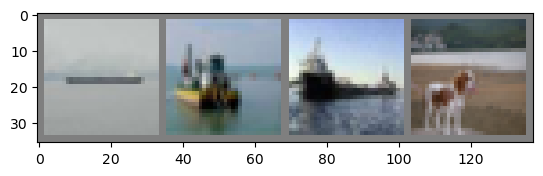

ship  ship  ship  dog  


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.149
[1,  4000] loss: 1.794
[1,  6000] loss: 1.625
[1,  8000] loss: 1.553
[1, 10000] loss: 1.504
[1, 12000] loss: 1.450
[2,  2000] loss: 1.383
[2,  4000] loss: 1.366
[2,  6000] loss: 1.328
[2,  8000] loss: 1.310
[2, 10000] loss: 1.306
[2, 12000] loss: 1.275
Finished Training


In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

This creates a 251kb results file `cifar_net.pth`.

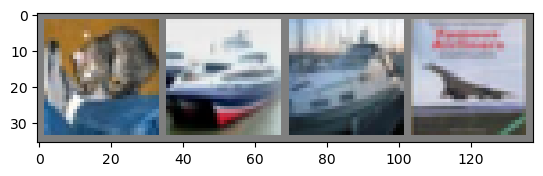

GroundTruth:  cat   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [10]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [11]:
outputs = net(images)

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  truck plane


In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [14]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 74.4 %
Accuracy for class: car   is 69.6 %
Accuracy for class: bird  is 29.8 %
Accuracy for class: cat   is 41.4 %
Accuracy for class: deer  is 47.7 %
Accuracy for class: dog   is 52.2 %
Accuracy for class: frog  is 41.9 %
Accuracy for class: horse is 64.6 %
Accuracy for class: ship  is 49.8 %
Accuracy for class: truck is 68.0 %


In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [16]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
inputs, labels = data[0].to(device), data[1].to(device)

To do some clean-up: `del dataiter`

In [27]:
del dataiter